# To perform Exploratory data analysis on dataset given as SampleSuperstore
#### You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data? 

### Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import the dataset

In [ ]:
dataset = pd.read_csv('SampleSuperstore.csv')
dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
dataset.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Visualize the heatmap

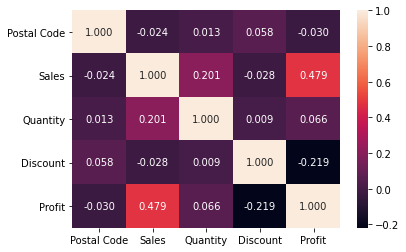

In [ ]:
corr = dataset.corr()
sns.heatmap(corr, annot=True, fmt ='.3f',robust= True)
plt.show()

### get the numerical features from all 13 features

In [ ]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != object]
print(numerical_features)
print('Number of numerical features: ',len(numerical_features))
dataset[numerical_features].head()

['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']
Number of numerical features:  5


,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164


### assume some features as discrete features from numerical features

In [ ]:
discrete_feature = ['Postal Code', 'Quantity', 'Discount']
discrete_feature

['Postal Code', 'Quantity', 'Discount']

### Visualize the counplot against these features

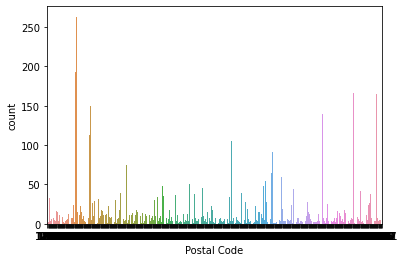

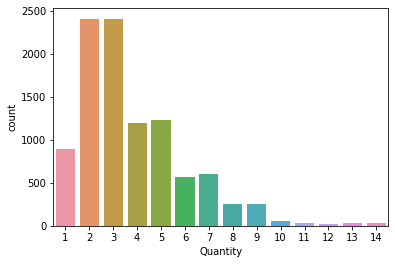

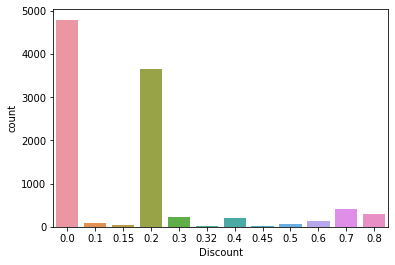

In [ ]:
for feature in discrete_feature:
  sns.countplot(x = feature, data = dataset)
  plt.show()

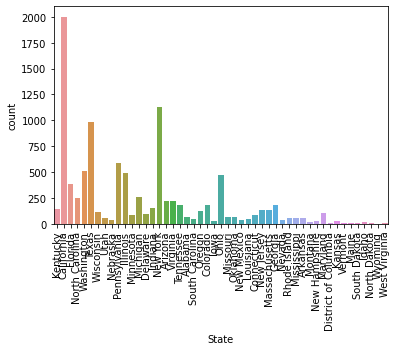

In [ ]:
sns.countplot(x = 'State', data= dataset)
plt.xticks(rotation = 90)
plt.show()

### get the Continuos Features from numerical features

In [ ]:
continuos_features = [feature for feature in numerical_features if feature not in discrete_feature]
print(continuos_features)
print('Number of continous features: ',len(continuos_features))
dataset[continuos_features].head()

['Sales', 'Profit']
Number of continous features:  2


,Sales,Profit
0,261.9600,41.9136
1,731.9400,219.5820
2,14.6200,6.8714
3,957.5775,-383.0310
4,22.3680,2.5164


### Relationship between discrete features and continous features

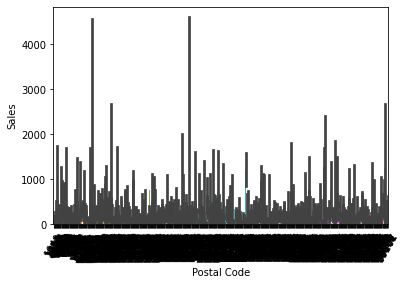

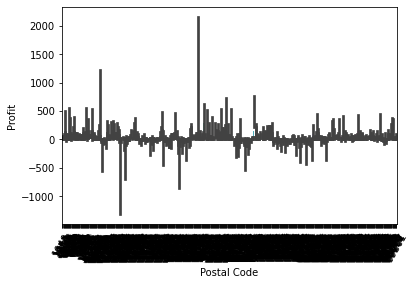

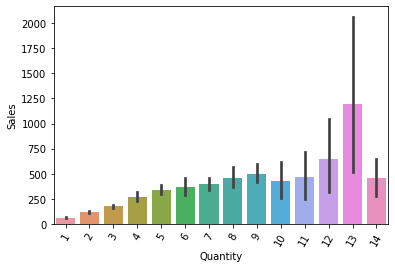

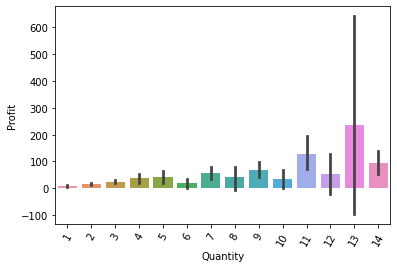

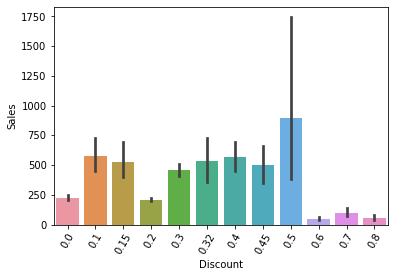

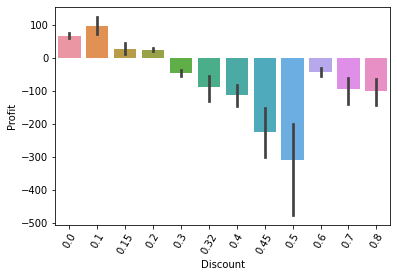

In [ ]:
for feature in discrete_feature:
  for j in continuos_features:
    sns.barplot(x = feature, y = j, data = dataset)
    plt.xticks(rotation = 60)
    plt.show()

### Relation between sales vs profit

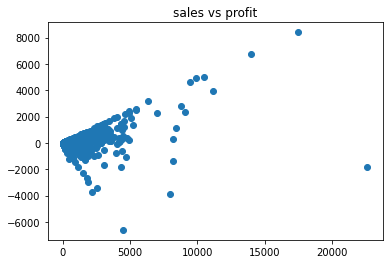

In [ ]:
plt.scatter(x = dataset['Sales'], y = dataset['Profit']) 
plt.title('sales vs profit')
plt.show()

### get Categorical features from reamaining

In [ ]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'object']
print(categorical_features)
print('Number of categorical features: ', len(categorical_features))
dataset[categorical_features].head()

['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
Number of categorical features:  8


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage


### The number of unique categories in each categorical feature

In [ ]:
for feature in categorical_features:
  print(f'The feature is ({feature}) and the number of categories are: ',len(dataset[feature].unique()))

The feature is (Ship Mode) and the number of categories are:  4
The feature is (Segment) and the number of categories are:  3
The feature is (Country) and the number of categories are:  1
The feature is (City) and the number of categories are:  531
The feature is (State) and the number of categories are:  49
The feature is (Region) and the number of categories are:  4
The feature is (Category) and the number of categories are:  3
The feature is (Sub-Category) and the number of categories are:  17


### Visualize each category in categorical features across its count in dataset

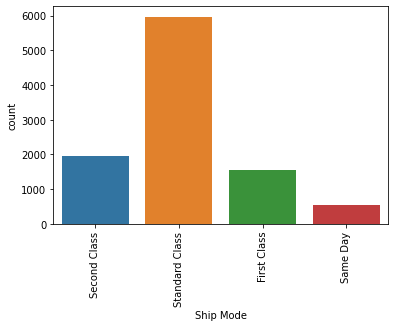

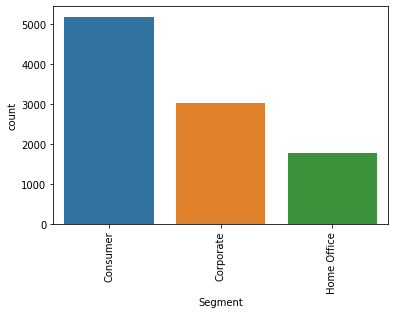

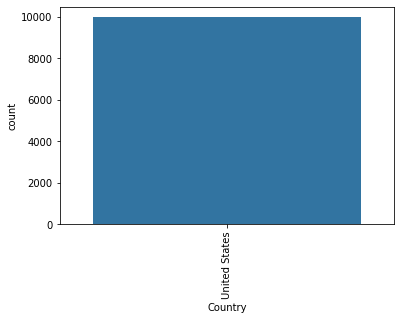

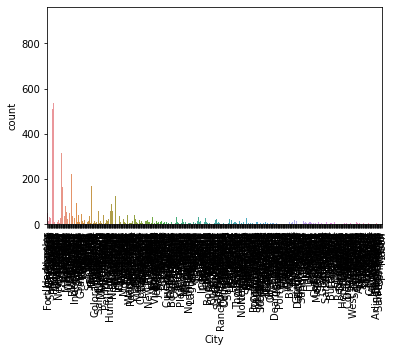

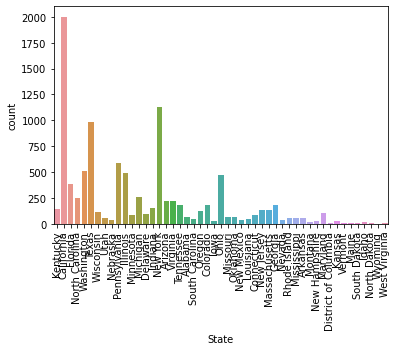

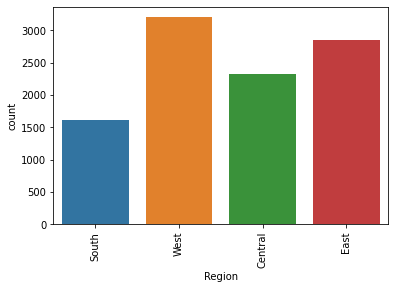

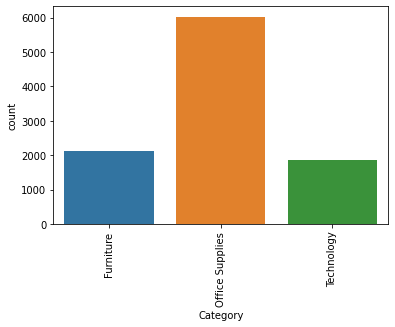

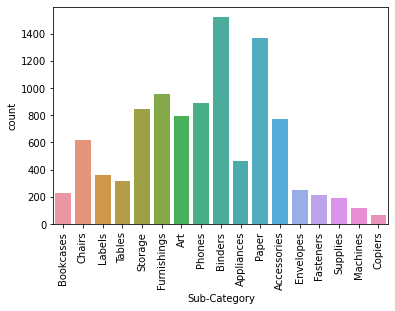

In [ ]:
for feature in categorical_features:
  sns.countplot(x = feature, data = dataset)
  plt.xticks(rotation = 90)
  plt.show()

### Visualize the relation between categorical features and profit

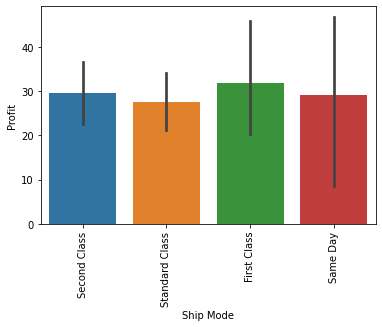

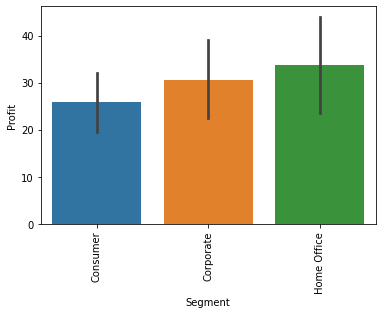

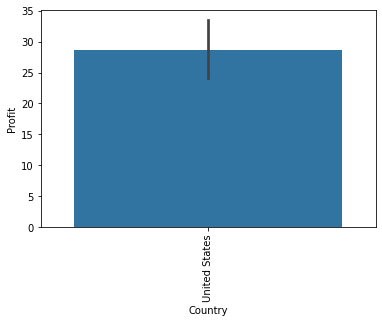

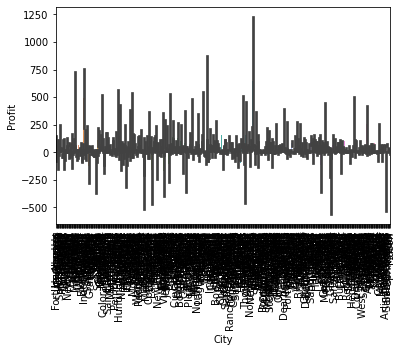

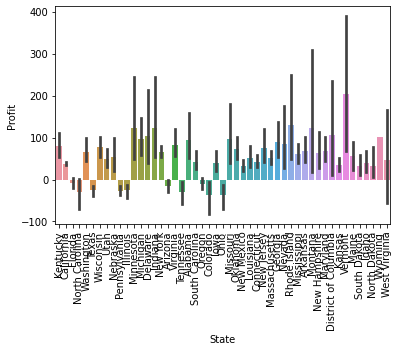

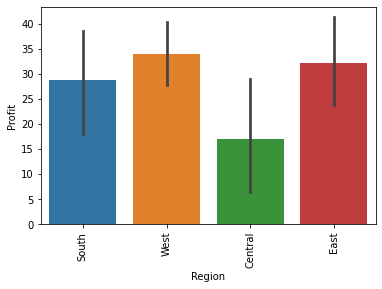

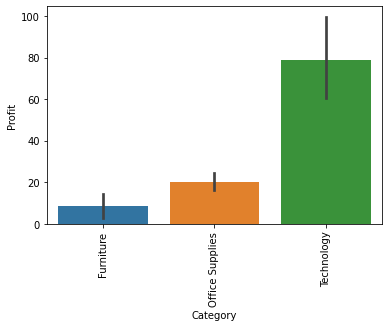

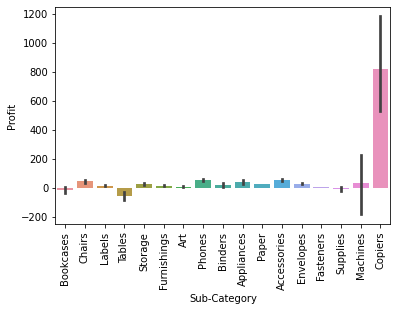

In [ ]:
for feature in categorical_features:
  sns.barplot(x = feature, y = 'Profit', data = dataset)
  plt.xticks(rotation = 90)
  plt.show()

### Pieplot of Subcategories distribution

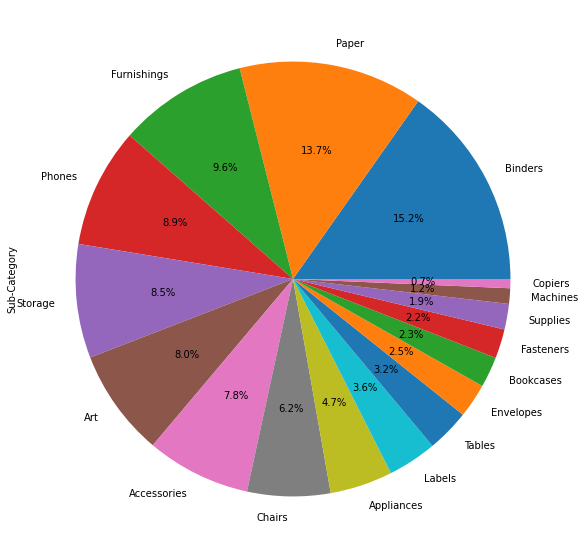

In [ ]:
plt.figure(figsize=(10,10))
dataset['Sub-Category'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

### Pieplot for categories distribution

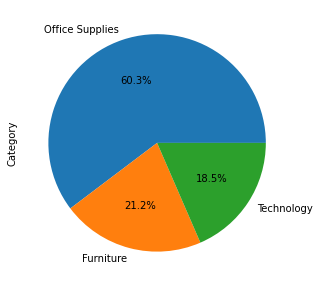

In [ ]:
plt.figure(figsize=(5,5))
dataset['Category'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

### Pieplot for region distribution

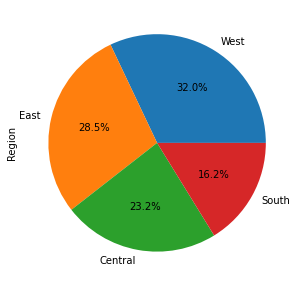

In [ ]:
plt.figure(figsize=(5,5))
dataset['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

### Total profit and sales in basis of subcategory

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<Figure size 720x576 with 0 Axes>

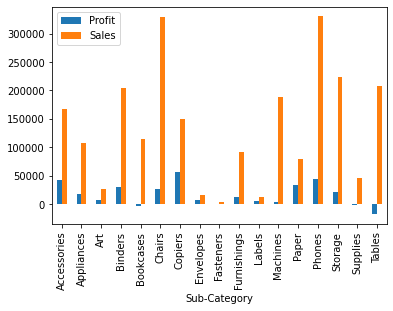

In [ ]:
plt.figure(figsize=(10,8))
dataset.groupby('Sub-Category')['Profit', 'Sales'].sum().plot.bar()
plt.show()

### Visualizing Profitable Cities

In [ ]:
top_cities = dataset.groupby('City')['Profit'].sum().reset_index().sort_values(by = 'Profit',
                                                                 ascending = False)
top_cities

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
...,...,...
80,Chicago,-6654.5688
241,Lancaster,-7239.0684
434,San Antonio,-7299.0502
207,Houston,-10153.5485


In [ ]:
# Top ten cities which gives greater profit

top_ten_cities_by_Profit = [top_cities['City'].head(10)]
top_ten_cities_by_Profit

[329    New York City
 266      Los Angeles
 452          Seattle
 438    San Francisco
 123          Detroit
 233        Lafayette
 215          Jackson
 21           Atlanta
 300      Minneapolis
 437        San Diego
 Name: City, dtype: object]

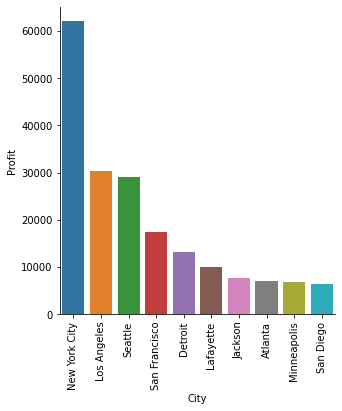

In [ ]:
sns.catplot(x= 'City', y= 'Profit', data= top_cities.head(10), kind='bar')
plt.xticks(rotation=90)
plt.show()

### Visualizing top subcategories for product

In [ ]:
top_subcategory = dataset.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending = False)
top_subcategory

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


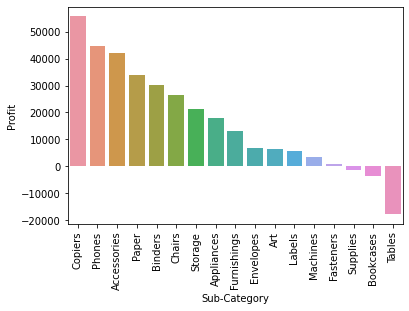

In [ ]:
sns.barplot(x='Sub-Category', y= 'Profit', data = top_subcategory)
plt.xticks(rotation = 90)
plt.show()